In [54]:
import pandas as pd

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [55]:
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)

ValueError Unknown string format: Jan:1:1970


In [56]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [57]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [58]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [59]:
import pandas as pd

print(pd.__version__)

1.4.4


In [64]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [65]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [67]:
#df.index.year

In [9]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

In [36]:
df = df.set_index('date').sort_index()
df

,coffee_consumption,year,month,day,weekday
date,,,,,
2019-01-01,14.301915,2019,1,1,Tuesday
2019-01-02,12.905900,2019,1,2,Wednesday
2019-01-03,10.046015,2019,1,3,Thursday
2019-01-04,6.354805,2019,1,4,Friday
2019-01-07,8.545563,2019,1,7,Monday
...,...,...,...,...,...
2019-12-25,12.250875,2019,12,25,Wednesday
2019-12-26,7.513206,2019,12,26,Thursday
2019-12-27,9.464345,2019,12,27,Friday


In [37]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [40]:
df.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=261)

In [43]:
df['2019-05']

/var/folders/b2/48jwswp14l9bjb3psl5v2fzm0000gn/T/ipykernel_31679/3193820371.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-05']


,coffee_consumption,year,month,day,weekday
date,,,,,
2019-05-01,9.970773,2019,5,1,Wednesday
2019-05-02,8.755956,2019,5,2,Thursday
2019-05-03,7.790948,2019,5,3,Friday
2019-05-06,13.196664,2019,5,6,Monday
2019-05-07,11.725856,2019,5,7,Tuesday
2019-05-08,8.495455,2019,5,8,Wednesday
2019-05-09,11.407965,2019,5,9,Thursday
2019-05-10,11.344190,2019,5,10,Friday
2019-05-13,9.517543,2019,5,13,Monday


In [44]:
df['2019-05-06':'2019-05-16'] # NB. inclusive

,coffee_consumption,year,month,day,weekday
date,,,,,
2019-05-06,13.196664,2019,5,6,Monday
2019-05-07,11.725856,2019,5,7,Tuesday
2019-05-08,8.495455,2019,5,8,Wednesday
2019-05-09,11.407965,2019,5,9,Thursday
2019-05-10,11.344190,2019,5,10,Friday
2019-05-13,9.517543,2019,5,13,Monday
2019-05-14,6.220478,2019,5,14,Tuesday
2019-05-15,12.743796,2019,5,15,Wednesday
2019-05-16,9.169615,2019,5,16,Thursday


In [45]:
by_day = df.asfreq('D')
by_day

,coffee_consumption,year,month,day,weekday
date,,,,,
2019-01-01,14.301915,2019.0,1.0,1.0,Tuesday
2019-01-02,12.905900,2019.0,1.0,2.0,Wednesday
2019-01-03,10.046015,2019.0,1.0,3.0,Thursday
2019-01-04,6.354805,2019.0,1.0,4.0,Friday
2019-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,9.464345,2019.0,12.0,27.0,Friday
2019-12-28,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN


In [46]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

,coffee_consumption,year,month,day,weekday,ffill,bfill
date,,,,,,,
2019-01-01,14.301915,2019.0,1.0,1.0,Tuesday,14.301915,14.301915
2019-01-02,12.905900,2019.0,1.0,2.0,Wednesday,12.905900,12.905900
2019-01-03,10.046015,2019.0,1.0,3.0,Thursday,10.046015,10.046015
2019-01-04,6.354805,2019.0,1.0,4.0,Friday,6.354805,6.354805
2019-01-05,NaN,NaN,NaN,NaN,NaN,6.354805,8.545563
2019-01-06,NaN,NaN,NaN,NaN,NaN,6.354805,8.545563
2019-01-07,8.545563,2019.0,1.0,7.0,Monday,8.545563,8.545563
2019-01-08,9.410101,2019.0,1.0,8.0,Tuesday,9.410101,9.410101
2019-01-09,7.219271,2019.0,1.0,9.0,Wednesday,7.219271,7.219271


In [47]:
df = df.fillna(0)

In [26]:
df.resample('3W').mean() # Every 3 weeks

,coffee_consumption,year,month,day
date,,,,
2019-01-06,10.902159,2019.0,1.000000,2.500000
2019-01-27,9.744190,2019.0,1.000000,16.000000
2019-02-17,10.855301,2019.0,1.733333,14.266667
2019-03-10,9.413472,2019.0,2.400000,15.800000
2019-03-31,11.062768,2019.0,3.000000,20.000000
2019-04-21,10.222518,2019.0,4.000000,10.000000
2019-05-12,10.092044,2019.0,4.533333,15.000000
2019-06-02,11.052819,2019.0,5.000000,22.000000
2019-06-23,9.592148,2019.0,6.000000,12.000000


In [27]:
df.resample('M').sum()

,coffee_consumption,year,month,day
date,,,,
2019-01-31,233.926749,46437,23,368
2019-02-28,206.038853,40380,40,302
2019-03-31,219.779000,42399,63,331
2019-04-30,222.030626,44418,88,329
2019-05-31,248.480093,46437,115,376
2019-06-30,183.656493,40380,120,310
2019-07-31,248.267463,46437,161,360
2019-08-31,224.007066,44418,176,353
2019-09-30,215.689004,42399,189,320


<AxesSubplot:xlabel='date'>

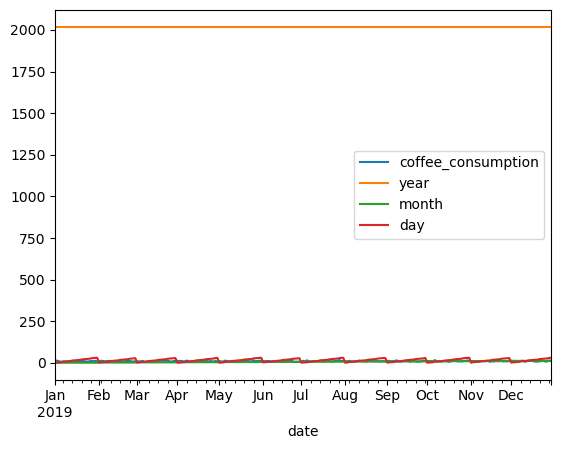

In [48]:
df.plot()

<AxesSubplot:xlabel='date'>

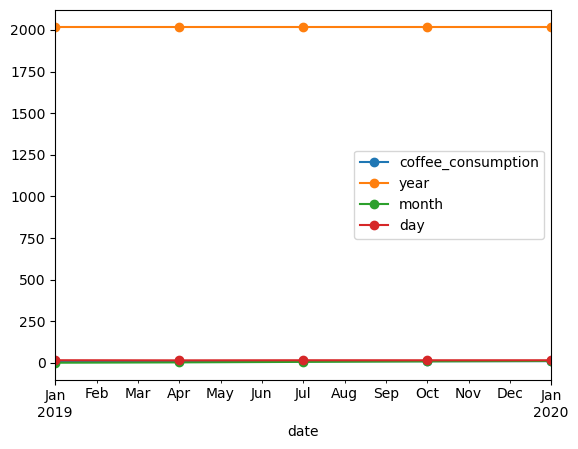

In [49]:
df.resample('3M').mean().plot(marker='o')

,coffee_consumption,year,month,day,rolling_3,rolling_5,rolling_7
date,,,,,,,
2019-01-06,10.902159,2019.0,1.0,2.5,NaN,NaN,NaN
2019-01-13,9.277212,2019.0,1.0,9.0,NaN,NaN,NaN
2019-01-20,10.265097,2019.0,1.0,16.0,10.148156,NaN,NaN
2019-01-27,9.690260,2019.0,1.0,23.0,9.744190,NaN,NaN
2019-02-03,10.639508,2019.0,1.2,23.8,10.198289,10.154847,NaN
2019-02-10,11.195485,2019.0,2.0,6.0,10.508418,10.213512,NaN
2019-02-17,10.730911,2019.0,2.0,13.0,10.855301,10.504252,10.385805
2019-02-24,9.808429,2019.0,2.0,20.0,10.578275,10.412919,10.229557
2019-03-03,9.486304,2019.0,2.2,21.4,10.008548,10.372127,10.259428


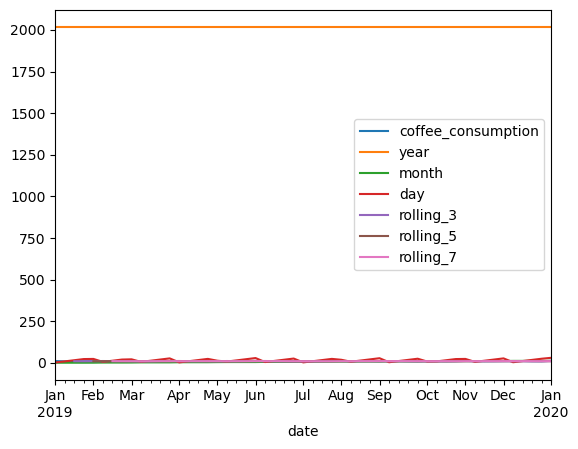

In [50]:
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

In [51]:
df.resample('W').mean().rolling(4).sum()


,coffee_consumption,year,month,day
date,,,,
2019-01-06,NaN,NaN,NaN,NaN
2019-01-13,NaN,NaN,NaN,NaN
2019-01-20,NaN,NaN,NaN,NaN
2019-01-27,40.134728,8076.0,4.0,50.5
2019-02-03,39.872077,8076.0,4.2,71.8
2019-02-10,41.790351,8076.0,5.2,68.8
2019-02-17,42.256164,8076.0,6.2,65.8
2019-02-24,42.374333,8076.0,7.2,62.8
2019-03-03,41.221128,8076.0,8.2,60.4


In [52]:
df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

,coffee_consumption,year,month,day,weekday,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,,,,,
2019-01-01,14.301915,2019,1,1,Tuesday,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,2019,1,2,Wednesday,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,2019,1,3,Thursday,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,2019,1,4,Friday,8.545563,10.046015,14.301915,-3.691210,-7.947110
2019-01-07,8.545563,2019,1,7,Monday,9.410101,6.354805,12.905900,2.190757,-4.360337
2019-01-08,9.410101,2019,1,8,Tuesday,7.219271,8.545563,10.046015,0.864539,-0.635914
2019-01-09,7.219271,2019,1,9,Wednesday,9.338456,9.410101,6.354805,-2.190831,0.864465
2019-01-10,9.338456,2019,1,10,Thursday,11.872667,7.219271,8.545563,2.119186,0.792894
2019-01-11,11.872667,2019,1,11,Friday,9.198816,9.338456,9.410101,2.534210,2.462566
